<a href="https://colab.research.google.com/github/220620cs06/just/blob/main/Computer_Vision_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload image file


Saving kittens.webp to kittens (2).webp
image: kittens (2).webp


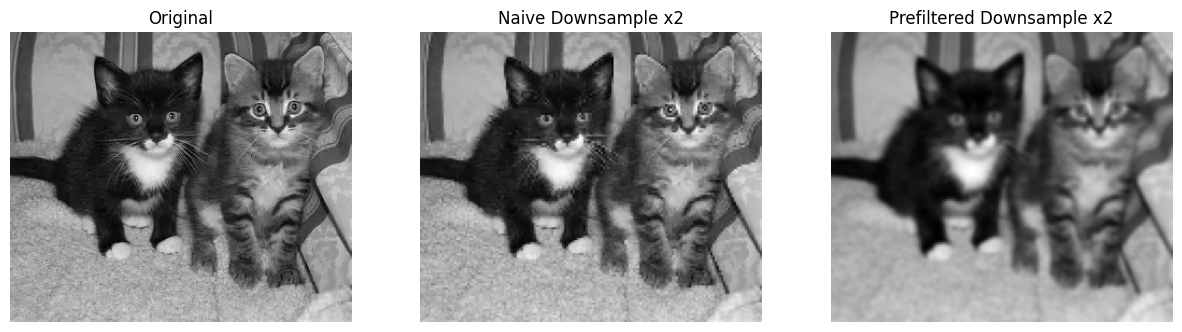

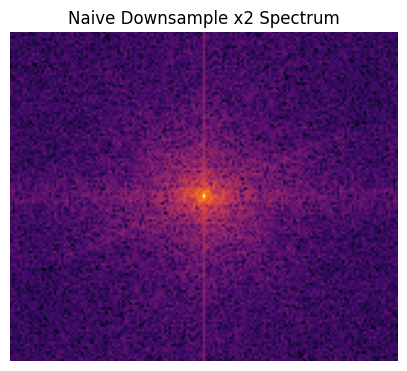

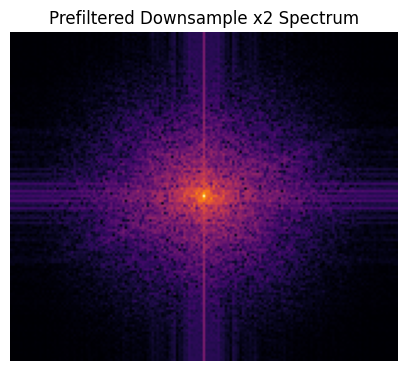

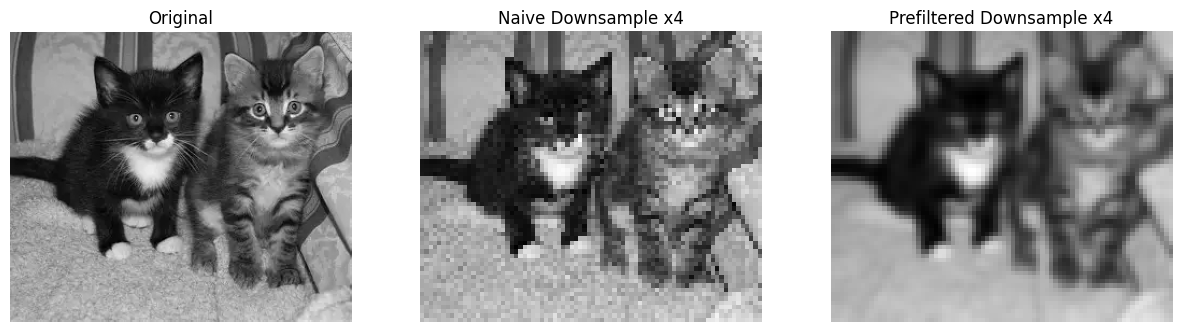

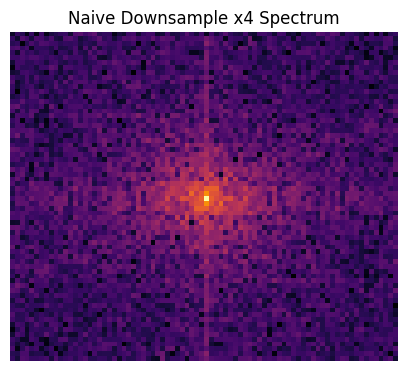

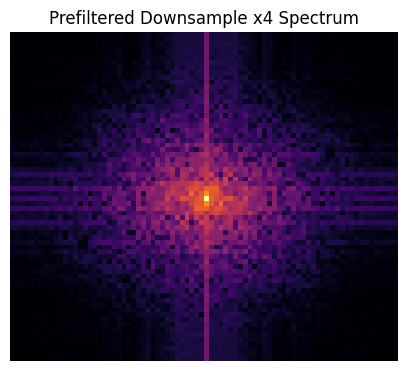

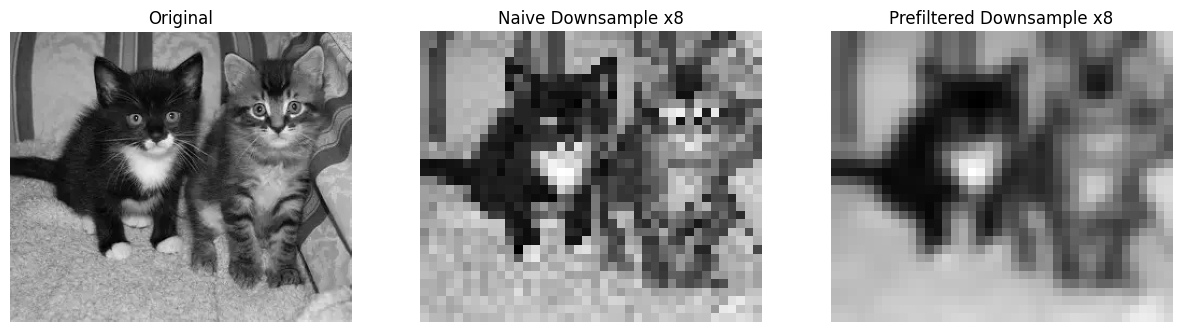

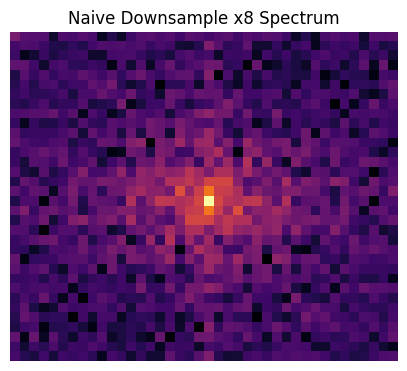

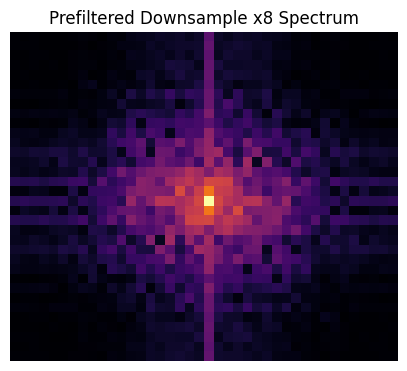

In [6]:
# Task1

import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
from google.colab import files
from skimage import img_as_float
from PIL import Image
print("upload image file")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("image:", img_path)
img = Image.open(img_path).convert('L')
img = np.array(img)
img = img_as_float(img)
def show_images(images, titles=None, cmap='gray', figsize=(12,4)):
    plt.figure(figsize=figsize)
    n = len(images)
    for i, img in enumerate(images):
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap=cmap)
        if titles: plt.title(titles[i])
        plt.axis('off')
    plt.show()

# def show_spectrum(img, title='FFT magnitude'):
#     F = fftpack.fftshift(fftpack.fft2(img))
#     mag = np.log1p(np.abs(F))
#     plt.figure(figsize=(5,5))
#     plt.imshow(mag, cmap='inferno')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# show_images([img], ['Original Image'])
# show_spectrum(img, 'Original Spectrum')

def downsample_naive(img, factor):
    return img[::factor, ::factor]

def gaussian_prefilter(img, factor, sigma=None):
    if sigma is None:
        sigma = 0.8 * factor
    ksize = int(max(3, 2*int(3*sigma)+1))
    blurred = cv2.GaussianBlur(img, (ksize, ksize), sigma)
    return blurred

factors = [2, 4, 8]

for f in factors:
    ds_naive = downsample_naive(img, f)
    blurred = gaussian_prefilter(img, f)
    ds_pref = downsample_naive(blurred, f)

    show_images(
        [img, ds_naive, ds_pref],
        [f'Original', f'Naive Downsample x{f}', f'Prefiltered Downsample x{f}'],
        figsize=(15,4)
    )

    show_spectrum(ds_naive, f'Naive Downsample x{f} Spectrum')
    show_spectrum(ds_pref, f'Prefiltered Downsample x{f} Spectrum')


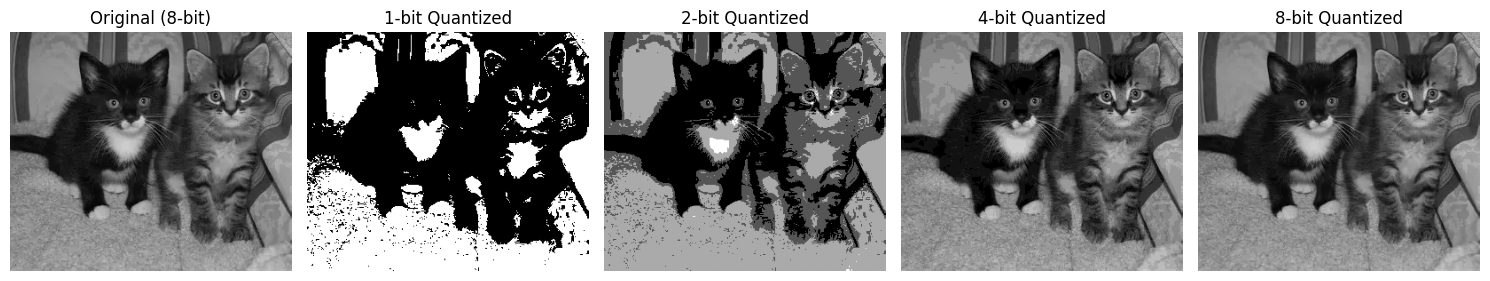

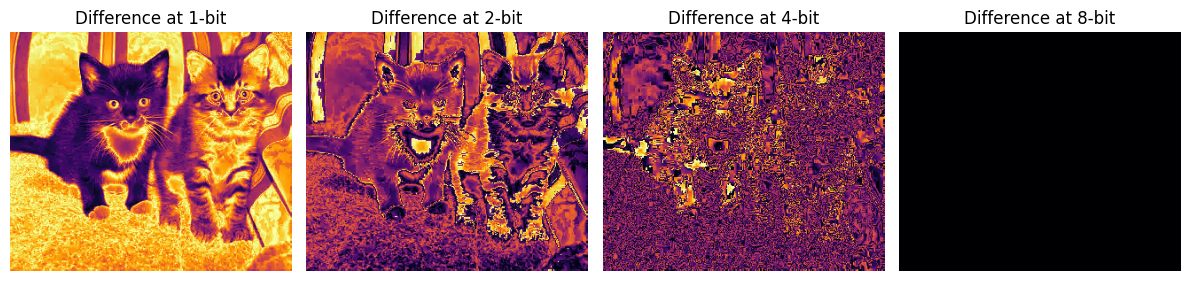

In [3]:
# Task2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
image_path = "/content/kittens.webp"
img = Image.open(image_path).convert('L')
img = np.array(img, dtype=np.float32) / 255.0
def quantize_image(img, bits):
    levels = 2 ** bits
    quantized = np.floor(img * levels) / (levels - 1)
    return np.clip(quantized, 0, 1)
bit_depths = [1, 2, 4, 8]
images = [img] + [quantize_image(img, b) for b in bit_depths]
titles = ["Original (8-bit)"] + [f"{b}-bit Quantized" for b in bit_depths]
plt.figure(figsize=(15,4))
for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,3))
for i, b in enumerate(bit_depths):
    diff = np.abs(img - quantize_image(img, b))
    plt.subplot(1, len(bit_depths), i+1)
    plt.imshow(diff, cmap='inferno')
    plt.title(f'Difference at {b}-bit')
    plt.axis('off')
plt.tight_layout()
plt.show()


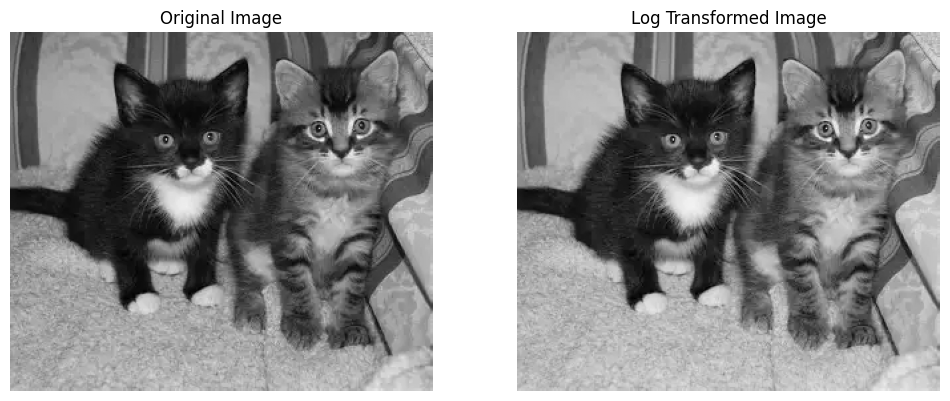

In [4]:
#Task3

import numpy as np
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('/content/kittens.webp', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0

c = 1 / np.log(1 + np.max(img))
log_transformed = c * np.log(1 + img)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.show()


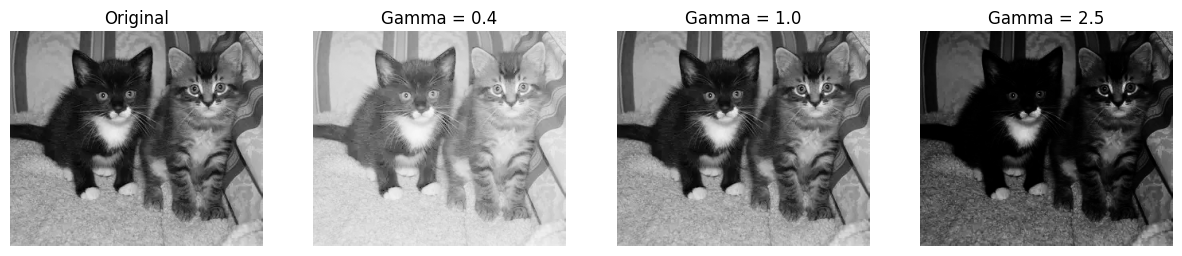

In [5]:
# Task4

import numpy as np
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('/content/kittens.webp', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0
gammas = [0.4, 1.0, 2.5]
gamma_corrected = [np.power(img, g) for g in gammas]
plt.figure(figsize=(15,5))
titles = [f'Gamma = {g}' for g in gammas]

plt.subplot(1, len(gammas)+1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, (gc, title) in enumerate(zip(gamma_corrected, titles)):
    plt.subplot(1, len(gammas)+1, i+2)
    plt.imshow(gc, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()
